In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
NUM_CLUSTERS = 4

dataset = pickle.load(open('clustered_embeddings.pkl', 'rb'))
all_embeddings = np.concatenate([data['embeds'] for data in dataset], axis=0)
print(all_embeddings.shape)

In [3]:
def cluster_embeddings(embeddings, n_clusters):
    all_embeddings = np.concatenate([data['embeds'] for data in embeddings], axis=0)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(all_embeddings)
    labels = kmeans.labels_
    print(len(labels))
    for i, data in enumerate(embeddings):
        data["label"] = labels[i]
    return embeddings

In [ ]:
clustered_embeddings = cluster_embeddings(dataset, NUM_CLUSTERS)
pickle.dump(clustered_embeddings, open("clustered_embeddings.pkl", "wb"))

In [ ]:
""" pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(all_embeddings)

colors = ["red", "blue", "green", "purple"]
for i, embedding in enumerate(dataset):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], color=colors[embedding["label"]])
plt.title("Clustered embeddings")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid()
plt.show() """

""" pca_ = PCA(n_components=3)
reduced_embeddings = pca_.fit_transform(np.concatenate([embedding["embeds"] for embedding in embeddings], axis=0))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, embedding in enumerate(embeddings):
    ax.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], reduced_embeddings[i, 2], color=colors[embedding["label"]])
plt.title("Clustered embeddings")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid()
plt.show() """

In [1]:
import os
import matplotlib.pyplot as plt
import pickle
from collections import Counter

In [2]:
dataset = pickle.load(open('clustered_embeddings.pkl', 'rb'))

In [3]:
print(len(dataset))
print(dataset[0].keys())
print(dataset[0]['patch'])
print(dataset[0]['embeds'].shape)
print(dataset[0]['label'])

528395
dict_keys(['patch', 'embeds', 'label'])
test_003_86016_6944.png
(1, 384)
0


In [4]:
unique_labels = set([data['label'] for data in dataset])
num_labels = len(unique_labels)

print("Number of unique labels: ", num_labels)
print("Labels: ", unique_labels)

Number of unique labels:  4
Labels:  {0, 1, 2, 3}


Number of selected patches:  40


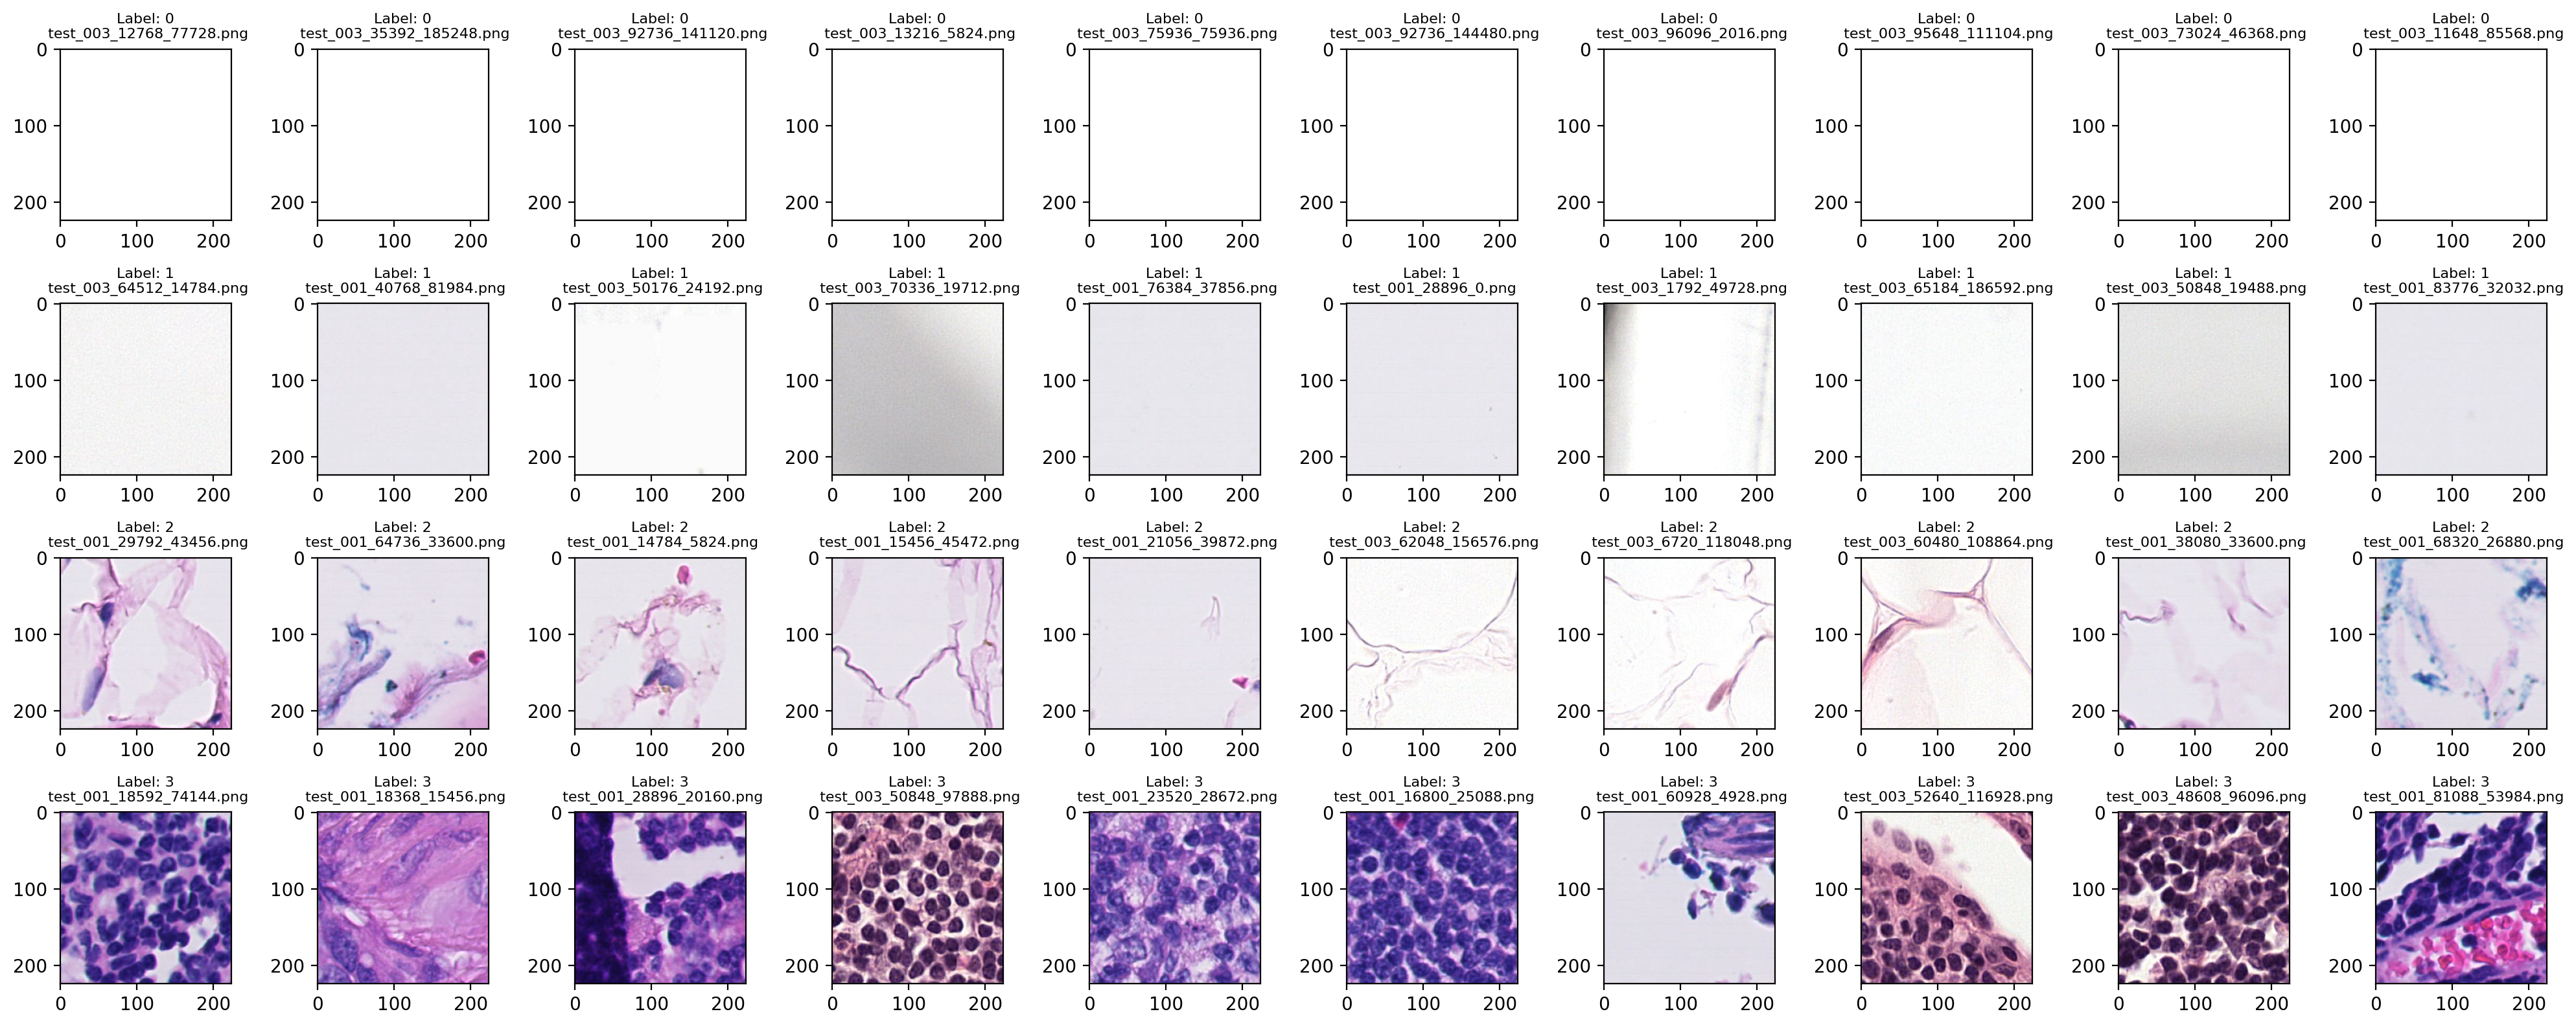

Counter({0: 220459, 1: 159223, 2: 104736, 3: 43977})


In [10]:
import random
num_patches_per_cluster = 10
selected_data = []

for label in unique_labels:
    data = [data for data in dataset if data['label'] == label]
    random.shuffle(data)
    selected_data.extend(data[:num_patches_per_cluster])

print("Number of selected patches: ", len(selected_data))

num_labels = len(unique_labels)
fig, axs = plt.subplots(num_labels, num_patches_per_cluster, figsize=(20, 8), dpi=200)

for i, data in enumerate(selected_data):
    title = f"Label: {data['label']}\n {data['patch']}"
    axs[i // num_patches_per_cluster, i % num_patches_per_cluster].set_title(title).set_size(8)
    patch_image = plt.imread(os.path.join('datasets/patches', data['patch']))
    axs[i // num_patches_per_cluster, i % num_patches_per_cluster].imshow(patch_image)
    axs[i // num_patches_per_cluster, i % num_patches_per_cluster] 

plt.tight_layout()
plt.show()

fig.savefig("selected_patches.png")


labels = [data['label'] for data in dataset]
counter = Counter(labels)
print(counter)